## Multiple Linear Regression

<img src='advertising.jpg' width=450>

### Paketlerimizi Yüklüyoruz.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### EDA

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()
#Hiç boş verimiz yok.Yaşasın :)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [9]:
abs(df.corr(numeric_only=True)['Sales'].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

<Axes: >

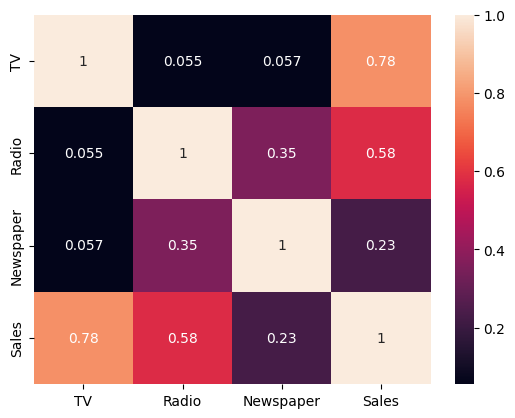

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Modelleme

In [11]:
x=df[['TV','Radio','Newspaper']]
y=df[['Sales']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
tahmin=model.predict(x_test)
mean_squared_error(y_test, tahmin)**.5  #**.5 yapınca karesini alıp root mean square error yapmış oluyorum.

1.7815996615334502

In [16]:
r2_score(y_test, tahmin)

0.899438024100912

In [17]:
#Test olarak ayırdığımız veri ile tahmin ettiğimiz veriyi aynı grafikte line chart ile görselleştiriyoruz.

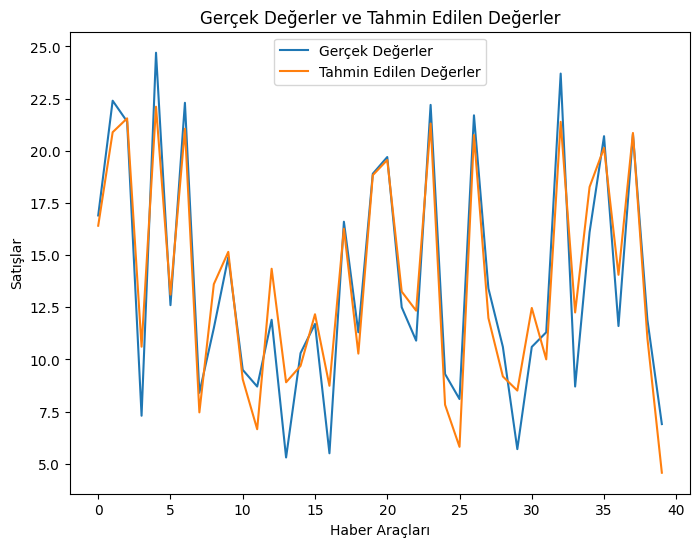

In [20]:
tahmin_verisi=model.predict(x_test)

plt.figure(figsize=(8,6))
plt.plot(range(len(y_test)), y_test, label='Gerçek Değerler')
plt.plot(range(len(tahmin_verisi)), tahmin_verisi, label='Tahmin Edilen Değerler')
plt.xlabel('Haber Araçları')
plt.ylabel('Satışlar')
plt.title('Gerçek Değerler ve Tahmin Edilen Değerler')
plt.legend()
plt.show()

#Bu kod için poe'den yardım aldım.

In [21]:
residuals=y_test-tahmin

<Axes: ylabel='Count'>

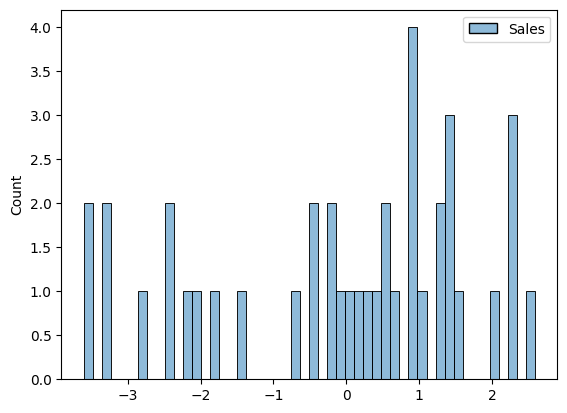

In [22]:
sns.histplot(residuals, bins=50)

### TV

In [23]:
x=df[['TV']]
y=df['Sales']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [25]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
tahmin=model.predict(x_test)
mean_squared_error(y_test, tahmin)**.5

3.194472431998898

In [26]:
r2_score(y_test, tahmin)

0.6766954295627077

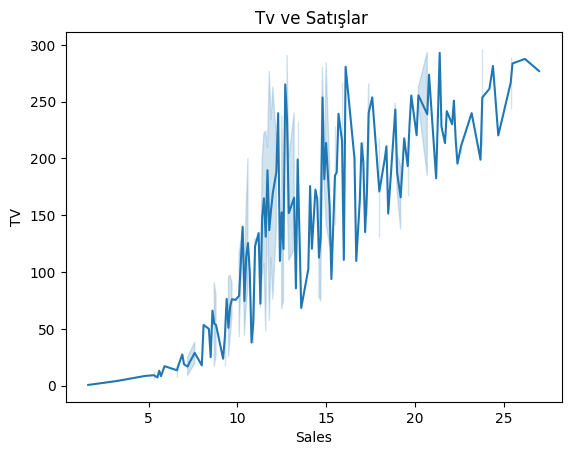

In [27]:
sns.lineplot(x='Sales', y='TV', data=df).set_title('Tv ve Satışlar ');

In [28]:
residuals=y_test-tahmin

<Axes: xlabel='Sales', ylabel='Count'>

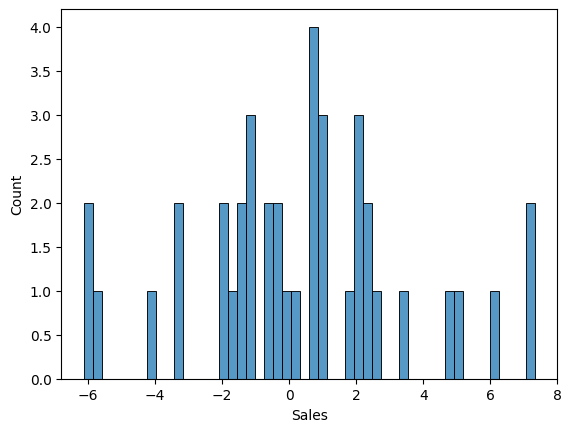

In [29]:
sns.histplot(residuals, bins=50)

### Radio

In [30]:
x=df[['Radio']]
y=df[['Sales']]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [32]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
tahmin=model.predict(x_test)
mean_squared_error(y_test, tahmin)**.5

4.8216974799471926

In [33]:
r2_score(y_test, tahmin)

0.2634309396999791

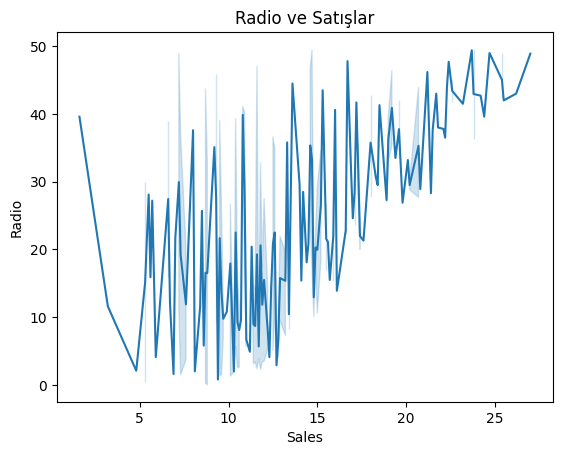

In [34]:
sns.lineplot(x='Sales', y='Radio', data=df).set_title('Radio ve Satışlar');

In [35]:
residuals=y_test-tahmin

<Axes: ylabel='Count'>

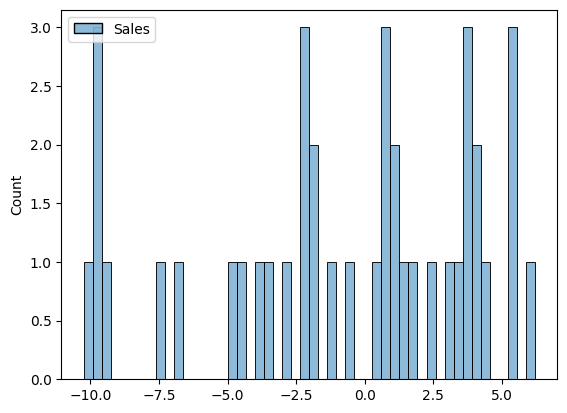

In [36]:
sns.histplot(residuals, bins=50)

### Newspaper 

In [37]:
x=df[['Newspaper']]
y=df[['Sales']]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [39]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
tahmin=model.predict(x_test)
mean_squared_error(y_test, tahmin)**.5

5.533600454969853

In [40]:
r2_score(y_test, tahmin)

0.029871749149522397

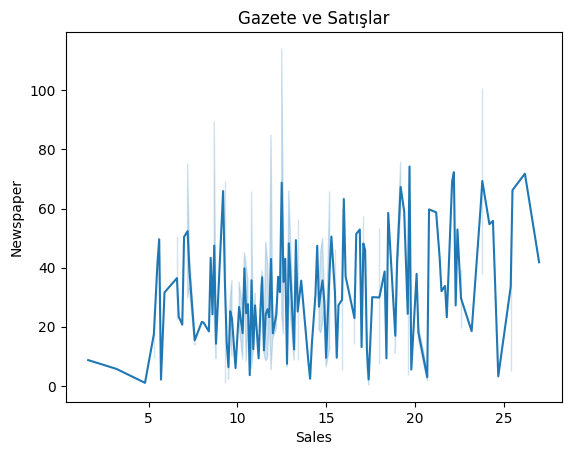

In [41]:
sns.lineplot(x='Sales', y='Newspaper', data=df).set_title('Gazete ve Satışlar');

In [42]:
residuals=y_test-tahmin

<Axes: ylabel='Count'>

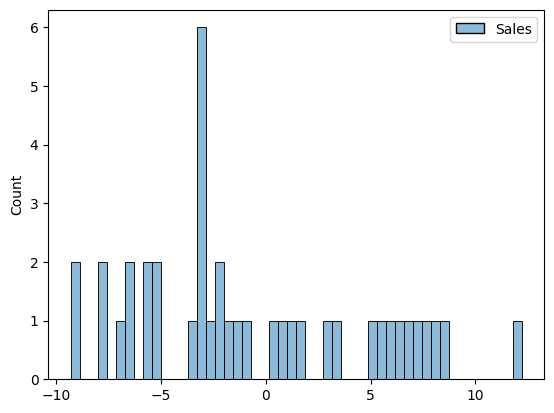

In [43]:
sns.histplot(residuals, bins=50)